In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

import cartopy as cart

import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import pandas as pd

from scipy import stats
import matplotlib.cm as cm

import random

In [7]:
moi_bathy = xr.load_dataset("/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/bathymetry_ORCA12_V3.3.nc")

In [8]:
lat_obs = -32.171
lon_obs = 6.287

lon_rest = abs(moi_bathy['nav_lon'][0,:] - lon_obs)
lat_rest = abs(moi_bathy['nav_lat'][:,0] - lat_obs)
lon_index = np.where(lon_rest == lon_rest.min())[0][0]
lat_index = np.where(lat_rest == lat_rest.min())[0][0]

In [9]:
initial_depth = moi_bathy['Bathymetry'][lat_index,lon_index].values
initial_lon = moi_bathy['nav_lon'][lat_index,lon_index].values
initial_lat = moi_bathy['nav_lat'][lat_index,lon_index].values

In [10]:
lon_sample = 6.287
lat_sample = -32.171
n_points = 10000

lon_cluster = [lon_sample]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lat_cluster = [lat_sample]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lon_cluster = np.array(lon_cluster) 
lat_cluster = np.array(lat_cluster)


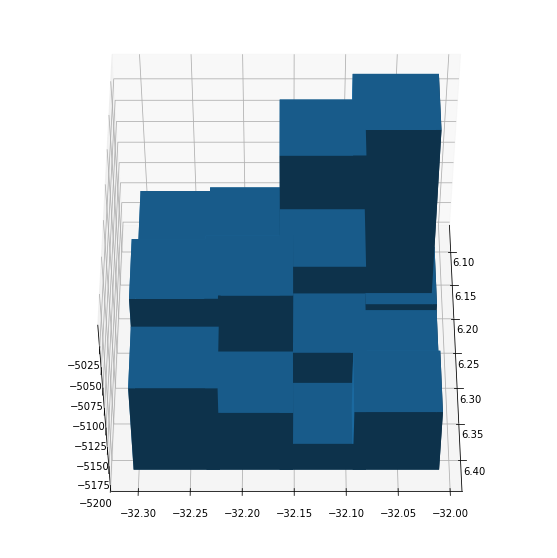

In [11]:
n = 2
lon_range = range(lon_index-2,lon_index+2)
lat_range = range(lat_index-2, lat_index+2)

sea_floor = 5200 - moi_bathy['Bathymetry'][lat_range, lon_range].values.ravel()
sea_lat =  moi_bathy['nav_lat'][lat_range, lon_range].values.ravel()
sea_lon =  moi_bathy['nav_lon'][lat_range, lon_range].values.ravel()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
dx = dy = 1/12 * np.ones_like(sea_floor)
dz= np.zeros_like(sea_floor) - 5200

ax.bar3d(sea_lon, sea_lat, dz, dx, dy, sea_floor, zorder=1)
# ax.scatter3D(initial_lon, initial_lat, -5000, color='r', s=100)

ax.view_init(elev=50., azim=0)

In [163]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/poop.zarr/')

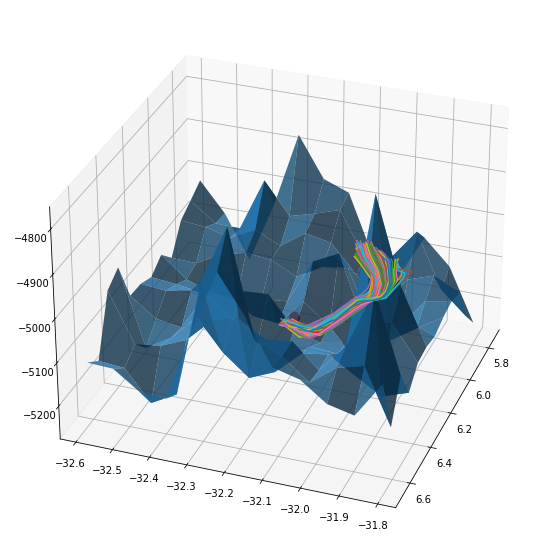

In [164]:
n = 6
lon_range = range(lon_index-n,lon_index+n)
lat_range = range(lat_index-n, lat_index+n)

sea_floor = - moi_bathy['Bathymetry'][lat_range, lon_range].values
sea_lat =  moi_bathy['nav_lat'][lat_range, lon_range].values
sea_lon =  moi_bathy['nav_lon'][lat_range, lon_range].values

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# dx = dy = 1/12 * np.ones_like(sea_floor)
# dz= np.zeros_like(sea_floor) - 5200

ax.plot_surface(sea_lon, sea_lat, sea_floor, alpha=0.8, zorder=0)
ax.scatter3D(initial_lon, initial_lat, -5100, color='r', s=100, zorder=2000)
fin = 30
for i in range(100):
    ax.plot3D(sim['lon'][i, :fin], sim['lat'][i, :fin], -sim['z'][i, :fin], zorder=2000)


ax.view_init(elev=30., azim=20)

In [165]:
lon_sample = 6.287
lat_sample = -32.171
n_points = 10000

lon_cluster = [initial_lon]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lat_cluster = [initial_lat]*n_points + np.random.normal(loc=0, scale=0.01, size=n_points)
lon_cluster = np.array(lon_cluster) 
lat_cluster = np.array(lat_cluster)

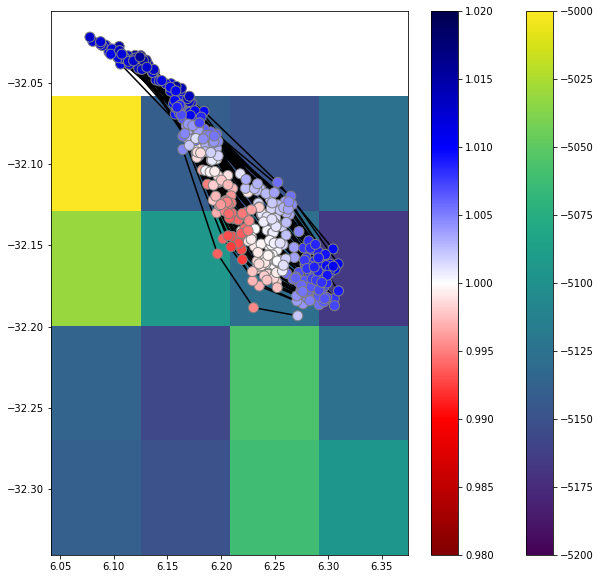

In [166]:
n = 3
lon_range = range(lon_index-2,lon_index+2)
lat_range = range(lat_index-2, lat_index+2)

sea_floor = - moi_bathy['Bathymetry'][lat_range, lon_range].values
sea_lat =  moi_bathy['nav_lat'][lat_range, lon_range].values
sea_lon =  moi_bathy['nav_lon'][lat_range, lon_range].values

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

im = ax.pcolormesh(sea_lon, sea_lat, sea_floor, shading='auto', vmax=-5000, vmin=-5200)
# ax.scatter(lon_cluster, lat_cluster)
# ax.scatter(lon_sample, lat_sample)
fin = 4
for i in range(100):
    ax.plot(sim['lon'][i, :fin], sim['lat'][i, :fin], color='k')

im2 = plt.scatter(sim['lon'][:, :fin], sim['lat'][:, :fin], 
            c = sim['seafloor'][:, :fin]/sim['z'][:, :fin], zorder=3, 
            edgecolors='grey', s=100, cmap='seismic_r', vmin=0.98, vmax=1.02)

ax.scatter(initial_lon, initial_lat, color='r', s=100)
plt.colorbar(im)
plt.colorbar(im2)


In [167]:
good_v = []
for i in tqdm(range(100)):
    
    s = np.where((sim['seafloor'][:, i]/sim['z'][:, i])<= 1)[0]
    if len(s)!=0:
        good_v.append(s)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 259.17it/s]


In [168]:
good_v

[array([ 1,  7, 20, 25, 26, 30, 32, 33, 34, 39, 40, 41, 42, 46, 48, 49, 50,
        52, 53, 57, 58, 59, 60, 63, 64, 66, 67, 73, 74, 76, 77, 78, 80, 83,
        88, 90]),
 array([ 1,  2,  4,  6,  7, 12, 14, 17, 21, 26, 30, 32, 34, 37, 39, 40, 46,
        48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 64, 66, 67, 73, 74, 76,
        77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 90, 92, 93, 95]),
 array([ 1, 21, 57, 64, 67, 74, 81]),
 array([44]),
 array([44, 98]),
 array([ 5,  8, 10, 13, 23, 27, 44, 51, 61, 68]),
 array([ 0, 98])]

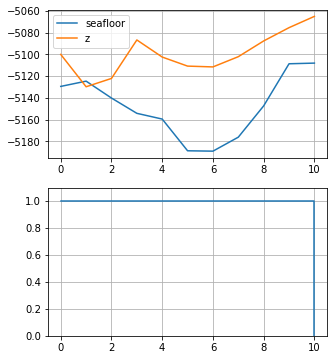

In [170]:
p = 33
plt.figure(figsize=(5,6))
ax1 = plt.subplot(211)
ax1.plot(-sim['seafloor'][p,:], label='seafloor')
ax1.plot(-sim['z'][p, :], label='z')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(sim['in_motion'][p,:], label='seafloor')
ax2.grid()
ax2.set_xlim(-0.5,10.5)
ax2.set_ylim(0, 1.1)
ax1.legend()

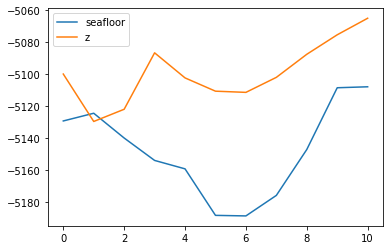

In [171]:
p = 33
plt.plot(-sim['seafloor'][p,:], label='seafloor')
plt.plot(-sim['z'][p, :], label='z')
plt.legend()

In [172]:
len(s)

0

In [173]:
s

array([], dtype=int64)

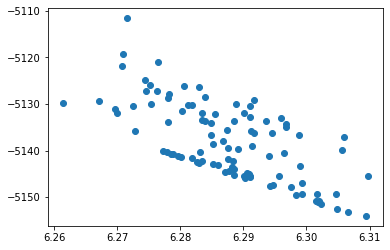

In [174]:
plt.scatter(sim['lon'][:, 0], -sim['seafloor'][:,0])

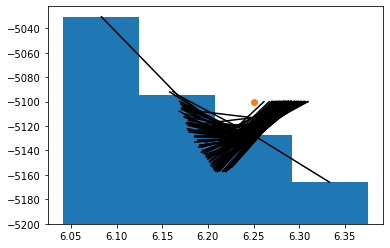

In [175]:
plt.bar(moi_bathy['nav_lon'][lat_index, lon_range], 5200-moi_bathy['Bathymetry'][lat_index, lon_range], bottom=-5200, width=1/12)
# plt.scatter(initial_lon, -5100)
plt.plot(moi_bathy['nav_lon'][lat_index, lon_range], -moi_bathy['Bathymetry'][lat_index, lon_range], color='k')

fin = 3
for i in range(100):
    plt.plot(sim['lon'][i, :fin], -sim['z'][i, :fin], color='k')
plt.scatter(initial_lon, -5100, zorder=3)


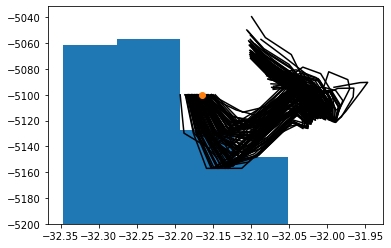

In [176]:
plt.bar(moi_bathy['nav_lat'][lat_range, lon_index], 5200 - moi_bathy['Bathymetry'][lat_range, lon_index], bottom=-5200, width=1/12)
# plt.scatter(initial_lat, -5100)
fin = 100
for i in range(100):
    plt.plot(sim['lat'][i, :fin], -sim['z'][i, :fin], color='k')
plt.scatter(initial_lat, -5100, zorder=3)

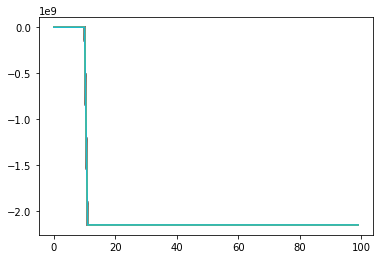

In [177]:
for i in range(100):
#     plt.plot(sim['seafloor'][i, :]/sim['z'][i,:], color='k')
    plt.plot(sim['in_motion'][i, :])
    
# plt.axhline(0)
# plt.ylim(-0.1,1.1)